# Explore here

In [19]:
# Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Se importa el csv como un DataFrame

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Problema: identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo

In [21]:
# Clasificación de variables y valores faltantes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [22]:
# Verificación de filas duplicadas

df.duplicated().sum()

np.int64(12)

In [23]:
# Eliminación de filas duplicadas

df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

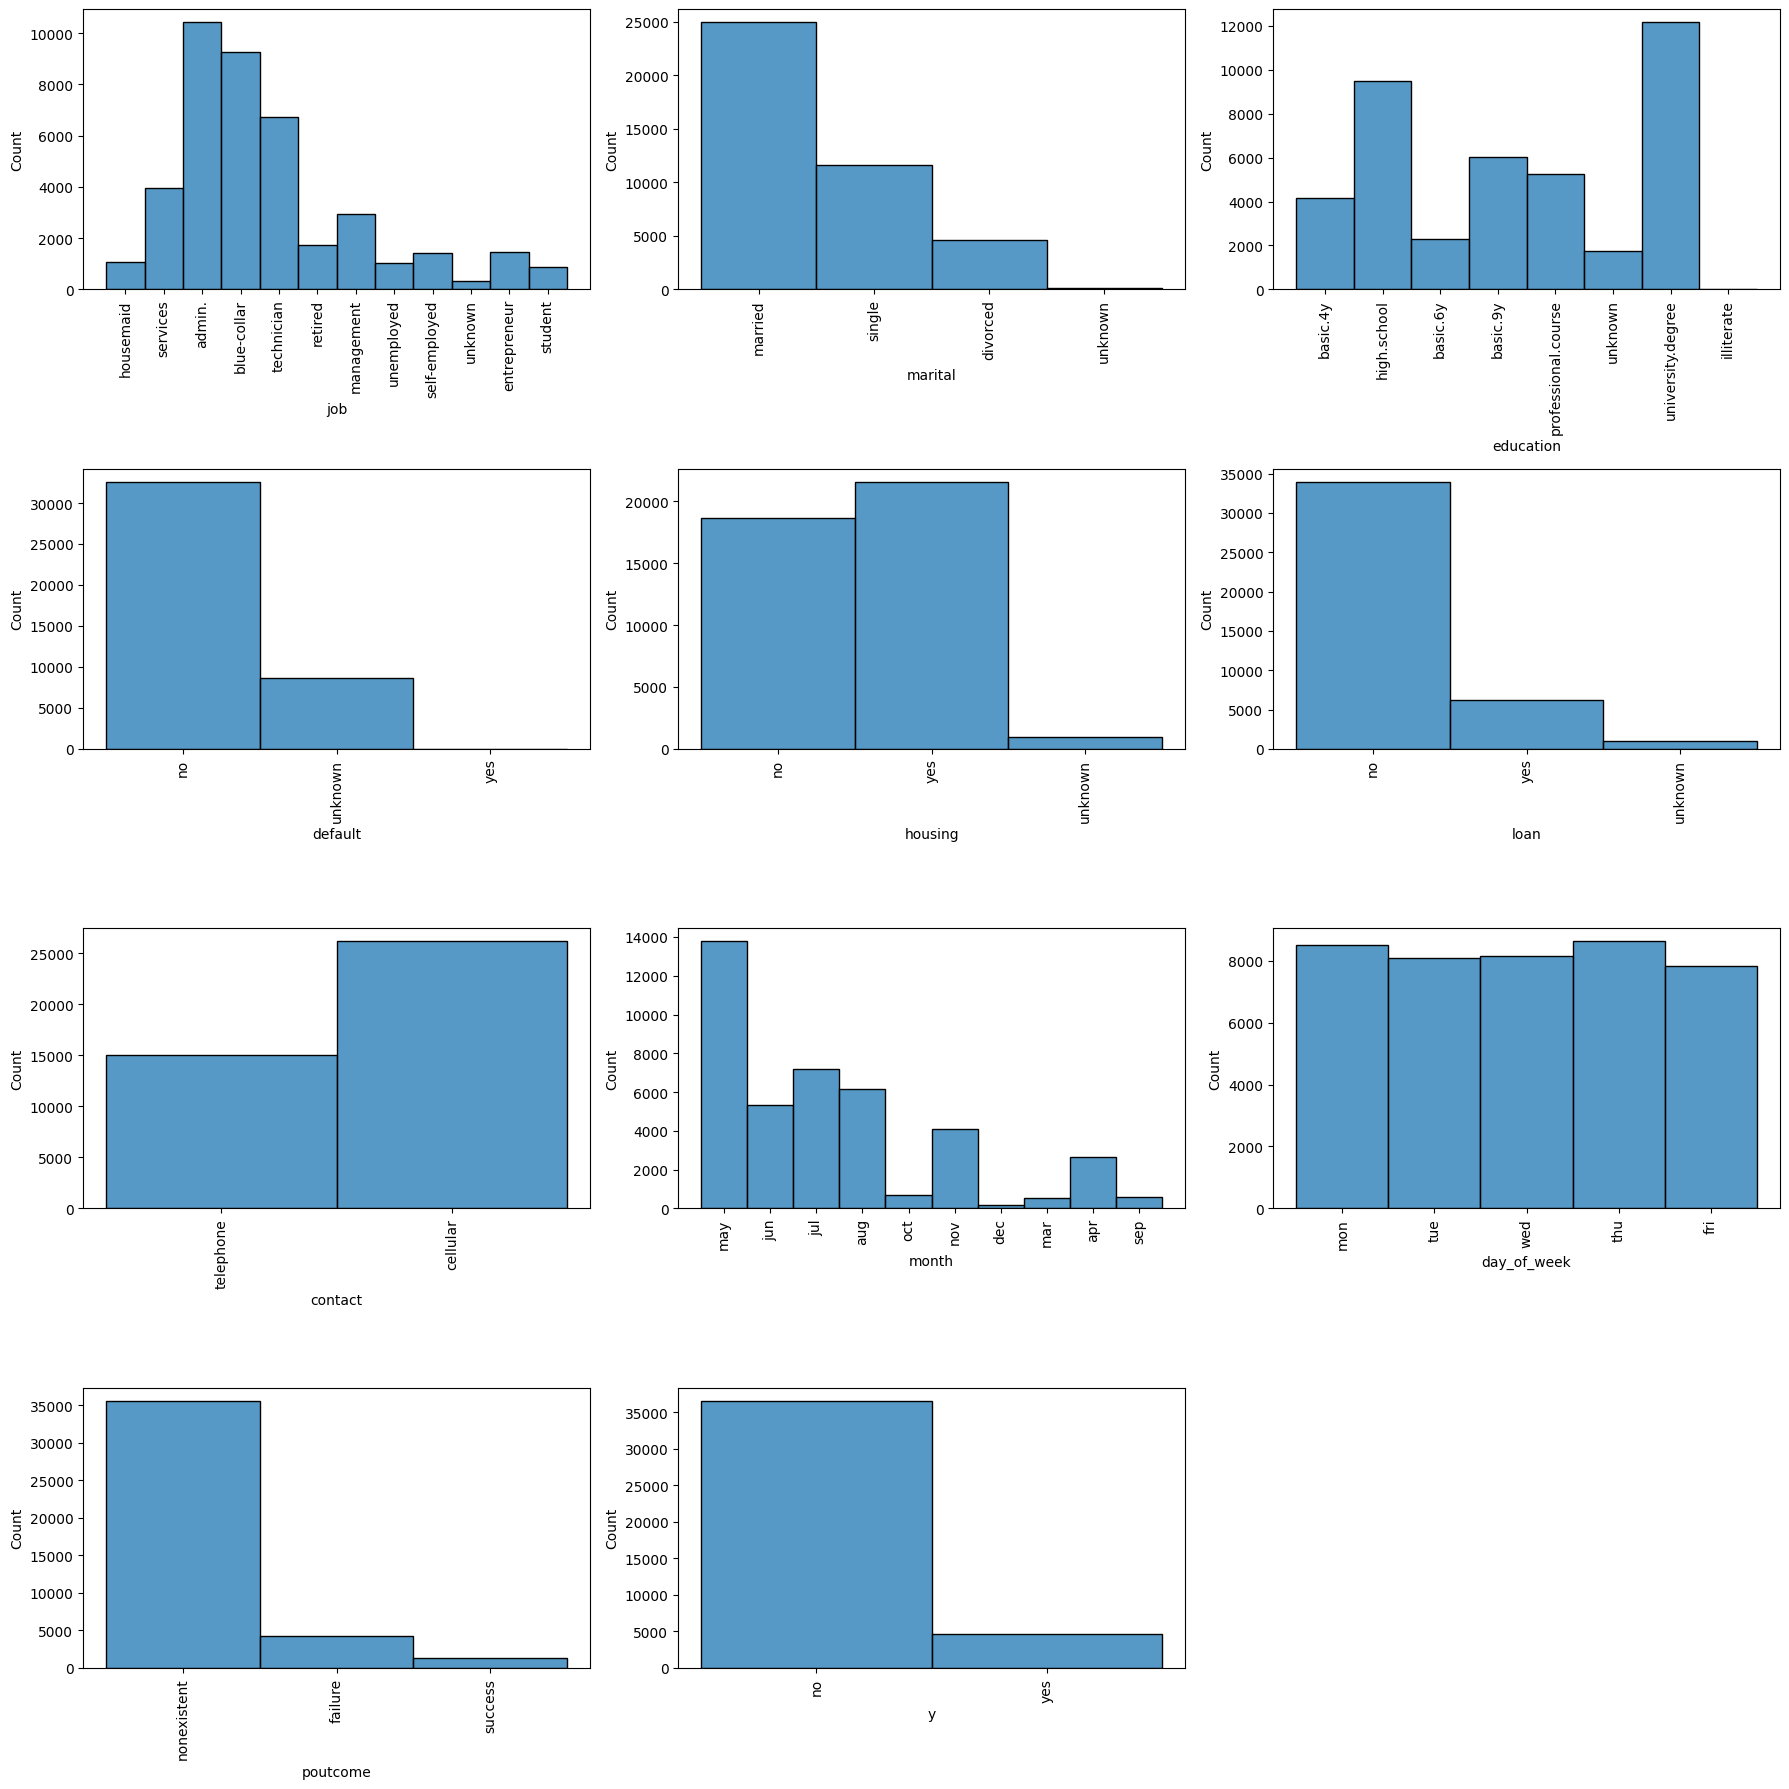

In [24]:
# Análisis Univariante 
    #Categorico

fig, axis = plt.subplots(4,3,figsize=(18,18))

#histogramas
sns.histplot(ax= axis[0,0],data=df,x='job')
sns.histplot(ax= axis[0,1],data=df,x='marital')
sns.histplot(ax= axis[0,2],data=df,x='education')
sns.histplot(ax= axis[1,0],data=df,x='default')
sns.histplot(ax= axis[1,1],data=df,x='housing')
sns.histplot(ax= axis[1,2],data=df,x='loan')
sns.histplot(ax= axis[2,0],data=df,x='contact')
sns.histplot(ax= axis[2,1],data=df,x='month')
sns.histplot(ax= axis[2,2],data=df,x='day_of_week')
sns.histplot(ax= axis[3,0],data=df,x='poutcome')
sns.histplot(ax= axis[3,1],data=df,x='y')

for ax in axis.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

fig.delaxes(axis[3,2])
plt.tight_layout()
plt.show()




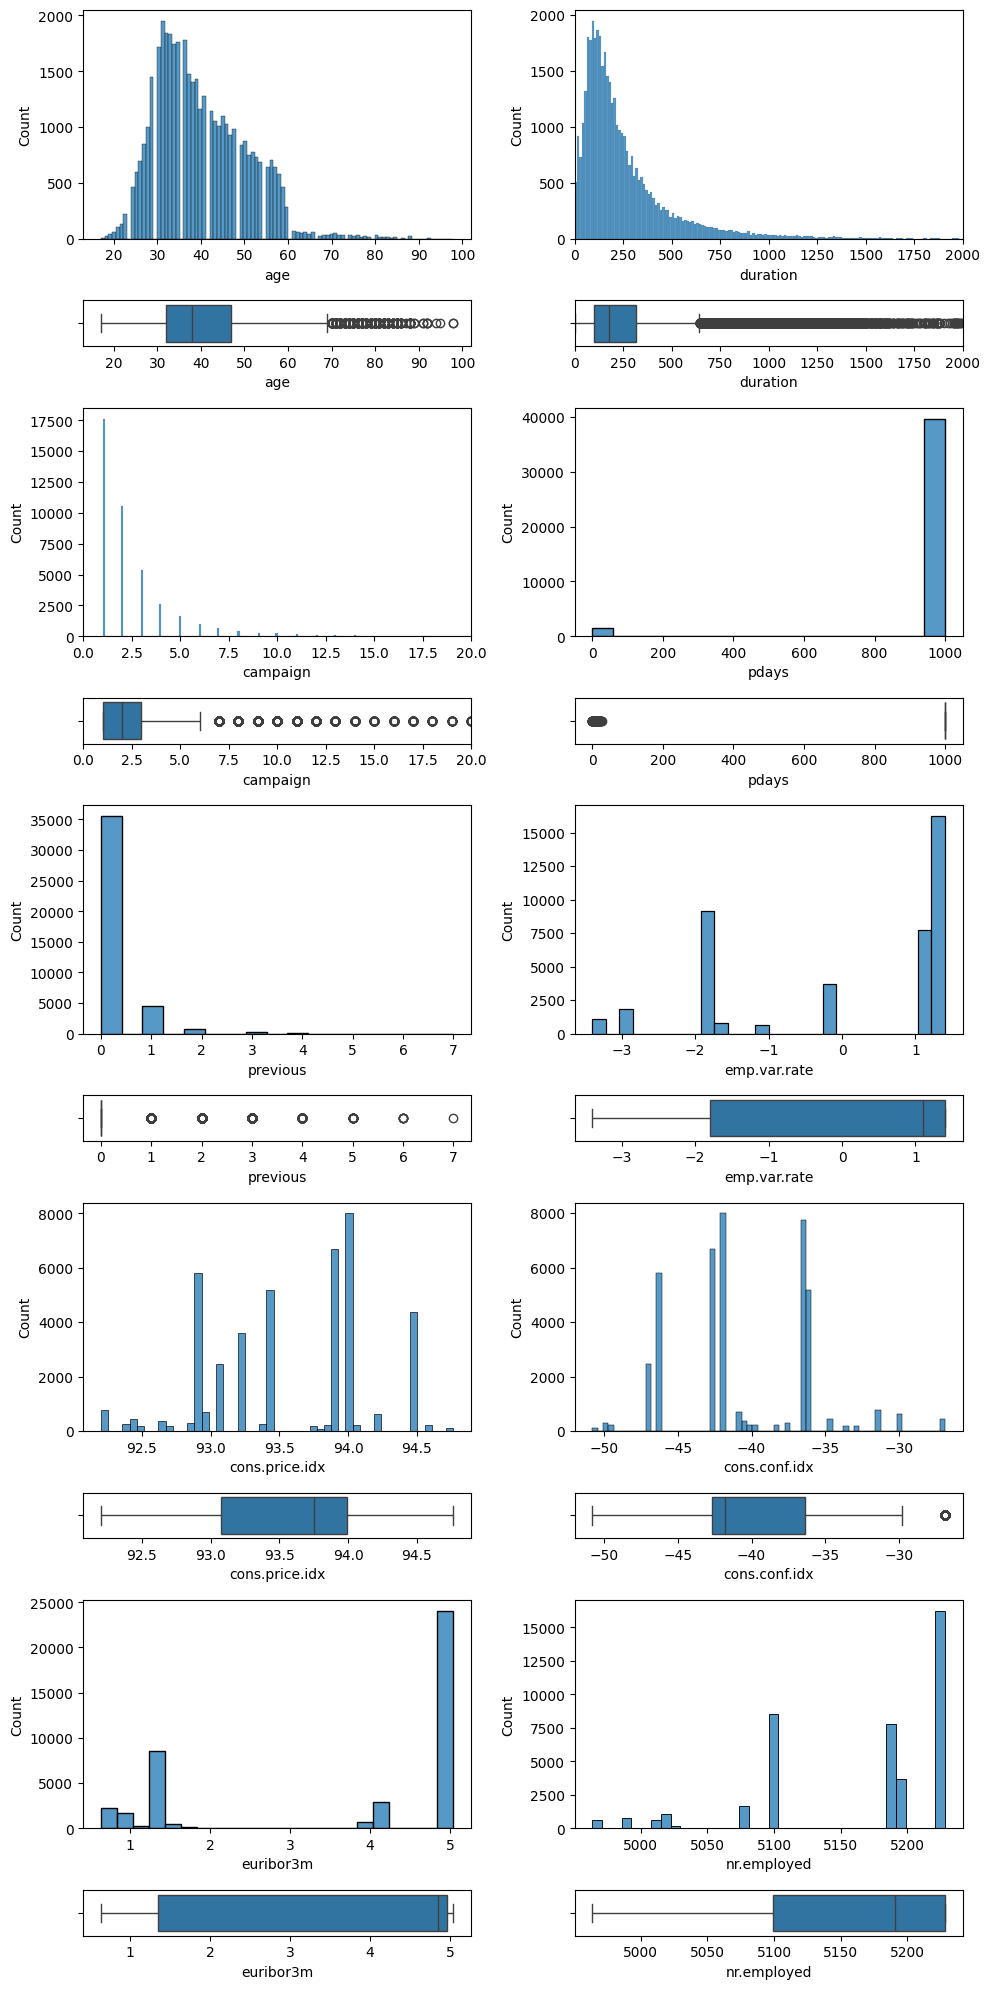

In [25]:
    # Númerico

fig, axis = plt.subplots(10,2,figsize=(10,20),gridspec_kw={"height_ratios":[5,1,5,1,5,1,5,1,5,1]}) 

sns.histplot(ax=axis[0,0],data=df,x='age')
sns.boxplot(ax=axis[1,0],data=df,x='age')

sns.histplot(ax=axis[0,1],data=df,x='duration').set_xlim(0,2000)
sns.boxplot(ax=axis[1,1],data=df,x='duration').set_xlim(0,2000)

sns.histplot(ax=axis[2,0],data=df,x='campaign').set_xlim(0,20)
sns.boxplot(ax=axis[3,0],data=df,x='campaign').set_xlim(0,20)

sns.histplot(ax=axis[2,1],data=df,x='pdays')
sns.boxplot(ax=axis[3,1],data=df,x='pdays')

sns.histplot(ax=axis[4,0],data=df,x='previous')
sns.boxplot(ax=axis[5,0],data=df,x='previous')

sns.histplot(ax=axis[4,1],data=df,x='emp.var.rate')
sns.boxplot(ax=axis[5,1],data=df,x='emp.var.rate')

sns.histplot(ax=axis[6,0],data=df,x='cons.price.idx')
sns.boxplot(ax=axis[7,0],data=df,x='cons.price.idx')

sns.histplot(ax=axis[6,1],data=df,x='cons.conf.idx')
sns.boxplot(ax=axis[7,1],data=df,x='cons.conf.idx')

sns.histplot(ax=axis[8,0],data=df,x='euribor3m')
sns.boxplot(ax=axis[9,0],data=df,x='euribor3m')

sns.histplot(ax=axis[8,1],data=df,x='nr.employed')
sns.boxplot(ax=axis[9,1],data=df,x='nr.employed')



plt.tight_layout()
plt.show()
            

Nota: Variable 'pdays' (número de días desde la última campaña hasta que fue contactado), solo contiene los valores 0 y 999. Lo cúal puede deberse a un error de la recoleccíon de los datos. Se decide eliminar ya que no puede aportar nada a la predicción

In [26]:
# Eliminación variable 'pdays'

df = df.drop('pdays',axis=1)

CLASE

In [32]:
df_eda = df[['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'y']]
df_eda

,age,duration,campaign,pdays,emp.var.rate,y
0,56,261,1,999,1.1,no
1,57,149,1,999,1.1,no
2,37,226,1,999,1.1,no
3,40,151,1,999,1.1,no
4,56,307,1,999,1.1,no
...,...,...,...,...,...,...
41183,73,334,1,999,-1.1,yes
41184,46,383,1,999,-1.1,no
41185,56,189,2,999,-1.1,no
41186,44,442,1,999,-1.1,yes


In [33]:
df_eda['y'] = pd.factorize(df['y'])[0]

/tmp/ipykernel_23030/2511612156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['y'] = pd.factorize(df['y'])[0]


In [7]:
df_eda.head()

,age,duration,campaign,pdays,emp.var.rate,y
0,56,261,1,999,1.1,0
1,57,149,1,999,1.1,0
2,37,226,1,999,1.1,0
3,40,151,1,999,1.1,0
4,56,307,1,999,1.1,0


In [8]:
X = df_eda.drop('y',axis=1)
y = df_eda['y']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=42,train_size=0.8)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegresion()
model.fit(X_train,y_train)

NameError: name 'LogisticRegresion' is not defined